In [57]:
import numpy as np
import torch
import pandas as pd
import random
import matplotlib.pyplot as plt
from collections import deque

import sys
sys.path.append('../')

from util import *

## Generation Function:

Utilizes BFS to find the shortest path to each matrix. Then stores the best first move to take given a matrix. Notice that it is unecessary to store the entire path of best moves as the matrix that results from appling the best move will already have been considered (and its best move will already be stored). Thus for matrix $X$ of length $k$ we will always be able to find the absolute shortest path back to the identity, given we have comupted all possible matrices of length $k$.

In [43]:
def tupalize(mat: torch.Tensor, move: int, dist: int):
    flat = mat.flatten()
    return (mat[0, 0].item(), mat[0, 1].item(), mat[1, 0].item(), mat[1, 1].item(), move, dist)

In [48]:
def generate(generators: list[torch.Tensor], max_len: int) -> pd.DataFrame:
    cols = {'val1': [], 'val2': [], 'val3': [], 'val4': [], 'best_move': [], 'dist_to_id': []}
    data = pd.DataFrame(cols)
    computed = dict()
    queue = deque()
    cur_len = 0

    I = torch.eye(2, dtype=torch.float64)
    queue.append(I)
    computed[I] = (-1, 0)
    while cur_len <= max_len or len(queue) > 0:
        item = queue.popleft()
        _, cur_len = computed[item]

        a = item.matmul(generators[0])
        b = item.matmul(generators[1])
        c = item.matmul(generators[2])
        d = item.matmul(generators[3])

        if a not in computed.keys():
            computed[a] = (2, cur_len+1)
            dfa = pd.DataFrame([tupalize(a, 2, cur_len+1)],
                                columns=['val1', 'val2', 'val3', 'val4', 'best_move', 'dist_to_id'])
            if cur_len <= max_len:
                queue.append(a)

        if b not in computed.keys():
            computed[b] = (3, cur_len+1)
            dfb = pd.DataFrame([tupalize(b, 3, cur_len+1)],
                                columns=['val1', 'val2', 'val3', 'val4', 'best_move', 'dist_to_id'])
            if cur_len <= max_len:
                queue.append(b)

        if c not in computed.keys():
            computed[c] = (0, cur_len+1)
            dfc = pd.DataFrame([tupalize(c, 0, cur_len+1)],
                                columns=['val1', 'val2', 'val3', 'val4', 'best_move', 'dist_to_id'])
            if cur_len <= max_len:
                queue.append(c)

        if d not in computed.keys():
            computed[d] = (1, cur_len+1)
            dfd = pd.DataFrame([tupalize(d, 1, cur_len+1)],
                                columns=['val1', 'val2', 'val3', 'val4', 'best_move', 'dist_to_id'])
            if cur_len <= max_len:
                queue.append(d)

        data = pd.concat([dfa, dfb, dfc, dfd, data])

    return data

In [86]:
U = torch.tensor([[1, 3], [0, 1]], dtype=torch.float64)
T = torch.tensor([[1, 0], [3, 1]], dtype=torch.float64)
U_INV = U.inverse()
T_INV = T.inverse()
gens = [U,T,U_INV,T_INV]

data = generate(gens, 4)
print(len(data))

5460


In [82]:
mats_moves_dists = torch.tensor(data.values, dtype=torch.float64)
mats = mats_moves_dists[:, :4]
moves = mats_moves_dists[:, 4]
dists = mats_moves_dists[:, 5]

b = torch.tensor([[1, 1]], dtype=torch.float64)
vecs = b.matmul(mats.reshape(-1, 2, 2)).flatten(start_dim=1)
xs = vecs[:, 0]
ys = vecs[:, 1]

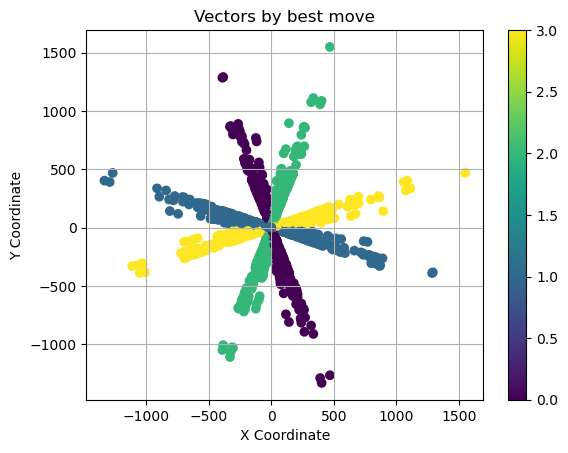

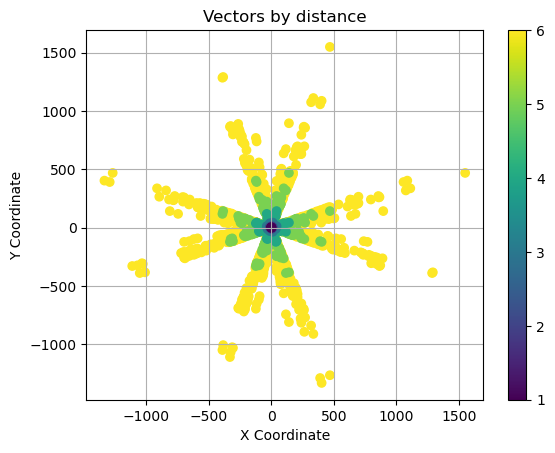

In [83]:
plt.scatter(xs, ys, c=moves)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Vectors by best move')
plt.grid(True)
plt.colorbar()
plt.show()

plt.scatter(xs, ys, c=dists)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Vectors by distance')
plt.grid(True)
plt.colorbar()
plt.show()

In [87]:
xsmall = generate(gens, 2)
small = generate(gens, 3)
medium = generate(gens, 5)
large = generate(gens, 6)
xlarge = generate(gens, 7)

In [88]:
xsmall.to_csv('./Data_files/labeled_points/sl2_Z_3s_bfs_xtra_small.csv', index=False)
small.to_csv('./Data_files/labeled_points/sl2_Z_3s_bfs_small.csv', index=False)
medium.to_csv('./Data_files/labeled_points/sl2_Z_3s_bfs_medium.csv', index=False)
large.to_csv('./Data_files/labeled_points/sl2_Z_3s_bfs_large.csv', index=False)
xlarge.to_csv('./Data_files/labeled_points/sl2_Z_3s_bfs_xtra_large.csv', index=False)